# **Examen #2 de Métodos computacionales 13-Feb-2024**

## **Instrucciones Generales:**  
- El examen consta de **3 puntos**, cada uno con el mismo valor.  
- **No está permitido** el uso de herramientas de inteligencia artificial para resolver los ejercicios.  
- Puede consultar únicamente la **documentación oficial, libros de texto, apuntes y recursos autorizados**.  
- Se valorará la **claridad, justificación de los procedimientos y el desarrollo completo** de las respuestas.  

**Tiempo total:** 2 horas

**Nota:** Cualquier indicio de uso de herramientas no permitidas será motivo de anulación del examen.  


# 1.(33%) Péndulo
 I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

In [1]:
from scipy.integrate import quad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Ratio(alpha):
    integrando = lambda phi: 1/np.sqrt((1-(np.sin(alpha/2)**2)*(np.sin(phi)**2)))
    I, error = quad(integrando, 0,np.pi/2) 
    return I, error

alpha = np.linspace(0, np.pi/2, 25)

df = pd.DataFrame(
    columns=["Integral", "Angle (Deg)", "Angle (Rad)", "Error"],
)
for angle in alpha:
    I, error = Ratio(angle)
    # Este metodo lo saque de aqui https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe
    # Note que en el parcial entregado en clase olvide poner 2/pi, por tanto daba un error exagerado, actualmente, con este cambio da valores casi exactos
    df.loc[-1] = [(2/np.pi)*I,np.rad2deg(angle) , angle , error]
    df.index = df.index + 1  
    df = df.sort_index()  
    


df

,Integral,Angle (Deg),Angle (Rad),Error
0,1.180341,90.00,1.570796,3.583722e-12
1,1.163307,86.25,1.505346,1.494405e-12
2,1.147450,82.50,1.439897,4.974422e-13
3,1.132690,78.75,1.374447,1.269313e-13
4,1.118959,75.00,1.308997,2.034316e-14
5,1.106195,71.25,1.243547,1.929131e-14
6,1.094342,67.50,1.178097,1.908460e-14
7,1.083352,63.75,1.112647,1.889295e-14
8,1.073182,60.00,1.047198,1.871559e-14
9,1.063792,56.25,0.981748,1.855183e-14


1.0


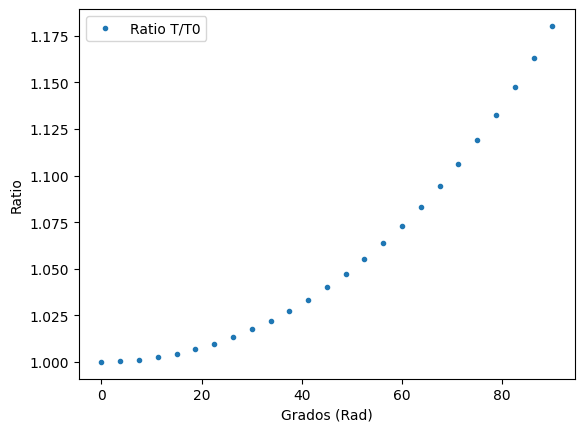

In [2]:
print(df["Integral"][24])
plt.plot( df["Angle (Deg)"], df["Integral"], ".", label="Ratio T/T0")
plt.xlabel("Grados (Rad)")
plt.ylabel("Ratio")
plt.legend()
plt.show()

Note que a medida que el angulo aumenta, el ratio $T/T_0$ es mayor, este ratio parece tender a crecer de forma exponencial

Por otro lado en el caso de que $\alpha = 0$ tenemos que el ratio debe ser igual a 1, ya que para angulos muy pequeños, $T = 2\pi \sqrt{\frac{l}{g}}$

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






    Año  NoSauvizado  Promedio_5
0  1880        -0.18       -0.11
1  1881        -0.10       -0.14
2  1882        -0.12       -0.18
3  1883        -0.18       -0.21
4  1884        -0.29       -0.25


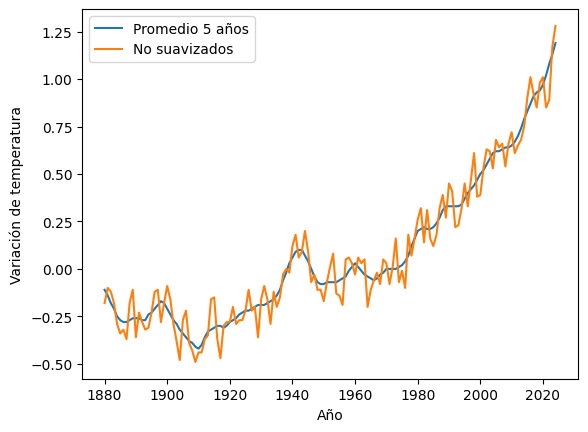

In [3]:
import pandas as pd
import matplotlib.pylab as plt

url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep="\\s+", header=None, skiprows=5)
data.columns = ["Año", "NoSauvizado", "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())


plt.plot(data["Año"], data["Promedio_5"], label="Promedio 5 años")
plt.plot(data["Año"], data["NoSauvizado"], label="No suavizados")
plt.xlabel("Año")
plt.ylabel("Variación de temperatura")
plt.legend()
plt.show()

above_2000 = data[data["Año"] > 2000]

Claramente la tendencia es a un incremento de las anomalias de tipo positivas (más calidas) a medida que avanzamos en el tiempo, de hecho, se podria considerar las anomalias como anomalas, teniendo en cuenta que generalmente se movian entre rangos de -0.50,0.25 entre los 1880-1980

El incremento de temperaturas anomalas, parece ser exponencial, osea cada vez incrementan mas

El valor modelado de la anomalia para 2030 es: 1.2217536367783381


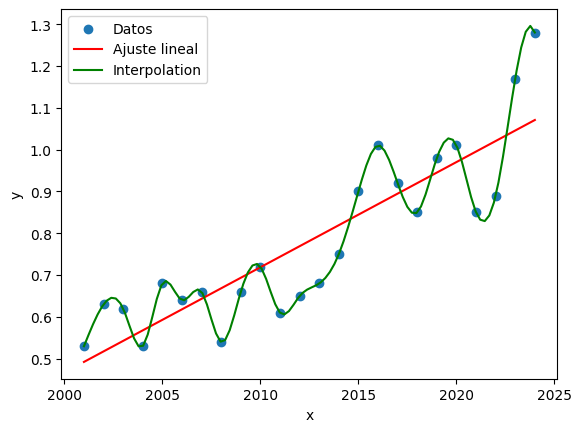

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline


def linear_func(x, m, b):
    return m * x + b

x = above_2000["Año"].values
y = above_2000["NoSauvizado"].values

params, covariance = curve_fit(linear_func, x, y)

m, b = params

x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

cs = CubicSpline(x, y)

print(f"El valor modelado de la anomalia para 2030 es: {linear_func(2030, m, b)}")

plt.scatter(x, y, label="Datos")
plt.plot(x_fit, y_fit, label="Ajuste lineal", color="red")
plt.plot(x_fit, cs(x_fit), label="Interpolation", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

6. Es preferible el ajuste de parametros, ya que permite predecir valores por fuera del rango dado,la inrerpolación tiende a tener errores demasiado grandes a medida que se aleja del set de puntos de interpolación, por lo tanto solo es una buena herramienta para valores dentro de un rango conocido,como por ejemplo 2000-2020

7. Dado el modelo de regresión lineal, con el poco entrenamiento y ajuste de parametros que tiene, la predicción que se puede dar es muy ambigua, en este caso es probable que siga aumentando con la tendencia lineal que tiene, si nos basamos en la pendiente de la recta de ajuste, podriamos dar un estimado de su valor, el cual es $\approx$ 1.28
   

# 3. Derivación numérica

En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente:

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

Bonus

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```python
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

- Encuentre el valor máximo de frecuencia

      Tiempo[ms]   AnguloDeg  AnguloRad
0              9   59.028961   1.030250
1             42   59.982327   1.046889
2             75   61.237453   1.068795
3            108   63.004925   1.099643
4            142   65.388771   1.141249
...          ...         ...        ...
2842       94709   94.937576   1.656973
2843       94743   96.479851   1.683891
2844       94776   97.940689   1.709387
2845       94809   99.318092   1.733428
2846       94843  100.637817   1.756461

[2847 rows x 3 columns]


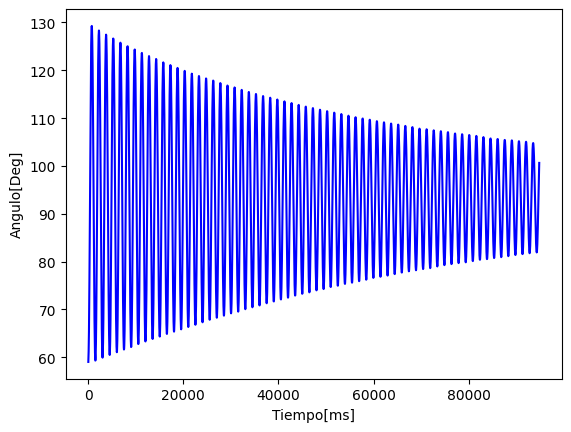

In [5]:

data = pd.read_csv('./Pendulo_simple.csv', sep=";")
data.columns = ["Tiempo[ms]" ,"AnguloDeg"]

replace_comma = lambda x: float(x.replace(",", "."))

data["AnguloDeg"] = data["AnguloDeg"].apply(replace_comma)
AnguloRad = []
for element in data["AnguloDeg"]:
    AnguloRad.append(np.deg2rad(element))

data["AnguloRad"] = AnguloRad



print(data)


plt.plot(data["Tiempo[ms]"], data["AnguloDeg"],"b-")
plt.xlabel("Tiempo[ms]")
plt.ylabel("Angulo[Deg]")
plt.show()

Parece que el pendulo describe un movimiento oscilante, con una disminucion en su periodo cada vez

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


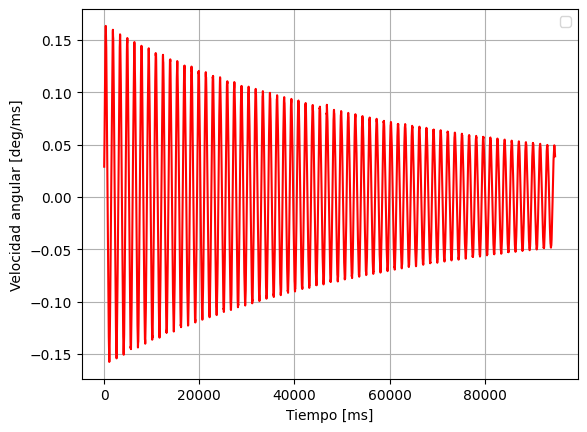

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


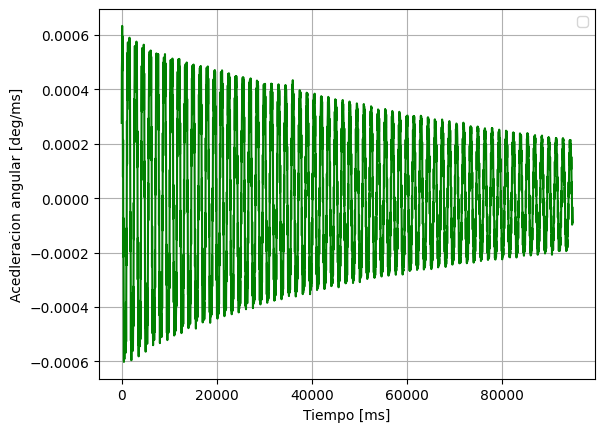

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


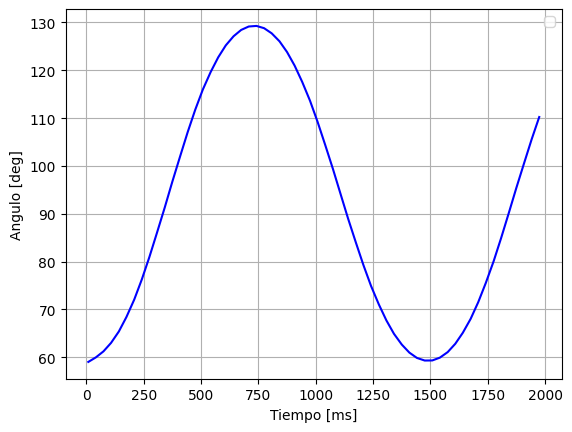

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


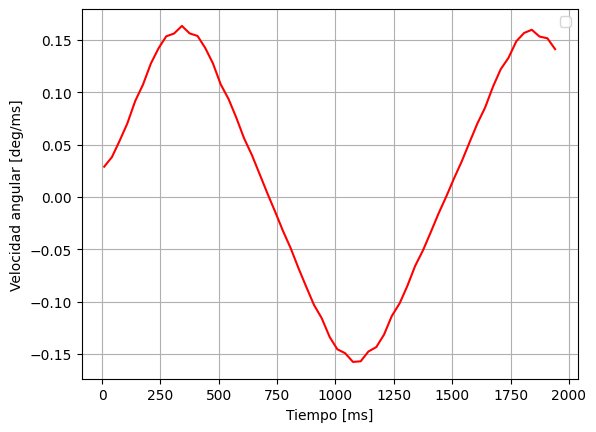

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


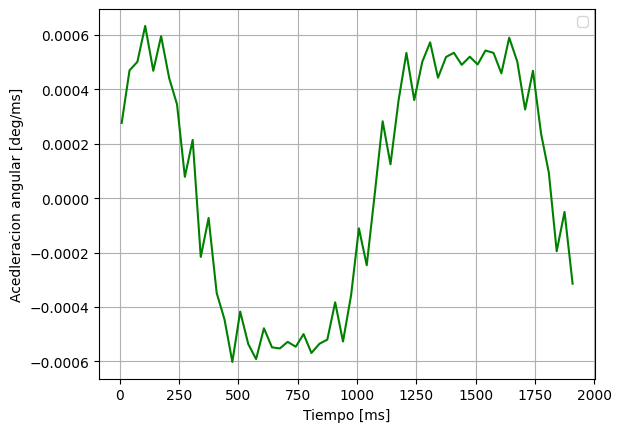

In [6]:
x = data["Tiempo[ms]"]
y = data["AnguloDeg"]

dtheta = np.diff(y) / np.diff(x)
plt.plot(x.iloc[:-1], dtheta, color="red")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Velocidad angular [deg/ms]")
plt.legend()
plt.grid()
plt.show()

dtheta2 = np.diff(dtheta) / np.diff(x.iloc[:-1])
plt.plot(x.iloc[:-2], dtheta2, color="green")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Acedleracion angular [deg/ms]")
plt.legend()
plt.grid()
plt.show()


data_short = data[data["Tiempo[ms]"] < 2000]


x = data_short["Tiempo[ms]"]
y = data_short["AnguloDeg"]

plt.plot(x, y, color="blue")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Angulo [deg]")
plt.legend()
plt.grid()
plt.show()

dtheta = np.diff(y) / np.diff(x)
plt.plot(x.iloc[:-1], dtheta, color="red")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Velocidad angular [deg/ms]")
plt.legend()
plt.grid()
plt.show()

dtheta2 = np.diff(dtheta) / np.diff(x.iloc[:-1])
plt.plot(x.iloc[:-2], dtheta2, color="green")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Acedleracion angular [deg/ms]")
plt.legend()
plt.grid()
plt.show()

La aceleración es bastante pequeña y cada vez menor, al igual que la velocidad y finalmente el periodo, por lo que podriamos suponer que el pendulo tiende al reposo a medida que pasa el tiempo

Note que el metodo directo usando la definición de derivada imprime un error considerable debido a la cancelación substractiva generada a la hora de usar los diferenciales, para reducir este es recomendable el uso de derivadas centrales, las cuales tienen un error del orden $O(h^2)$

/Users/neuman/anaconda3/lib/python3.10/site-packages/numpy/lib/polynomial.py:847: RuntimeWarning: invalid value encountered in add
  val = NX.concatenate((zr, a1)) + a2
/Users/neuman/anaconda3/lib/python3.10/site-packages/numpy/lib/polynomial.py:844: RuntimeWarning: invalid value encountered in add
  val = a1 + a2


(0.0, 2.0)

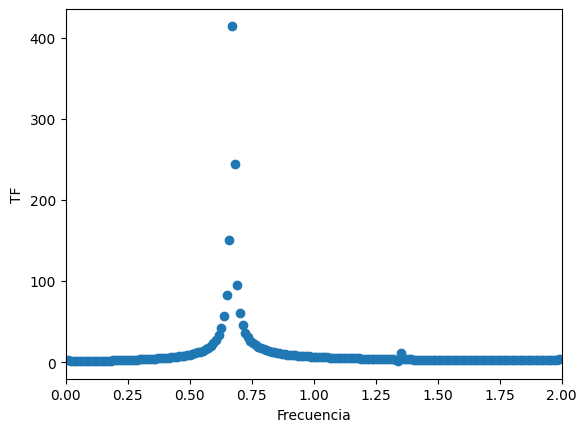

In [7]:
import scipy.fft as fft
from scipy.interpolate import lagrange


df = data

tf = fft.fft(df["AnguloRad"].values)
T = 33e-3  # Paso del tiempo
N = len(df["Tiempo[ms]"])
xf = fft.fftfreq(N, T)[: N // 2]

poly = lagrange(xf[1 : N // 2], np.abs(tf[1 : N // 2]))

plt.plot(xf[1 : N // 2], np.abs(tf[1 : N // 2]), "o")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

In [8]:
# plt.plot(np.linspace(0,2,1000), poly(np.linspace(0,2,1000)))

La verdad me enrede mucho con esto